In [15]:
# 1. Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 2. Load Iris Dataset & Convert to Binary
data = load_iris()
X = data.data
y = data.target

# Keep only classes 0 and 1 (binary classification)
mask = (y != 2)
X = X[mask]
y = y[mask]

In [3]:
# 3. Train-Test Split + Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 4. Build a Single-Layer Perceptron in Keras

# This is a single-layer neural network with 1 output neuron and a sigmoid activation.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(4,))
])

# Dense(1) → 1 output neuron
# activation='sigmoid' → output between 0 and 1
# input_shape=(4,) → 4 features in Iris dataset
# This is the modern equivalent of Rosenblatt’s perceptron.

In [7]:
# 5. Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 6. Train the Model
history = model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3769 - loss: 0.9948 
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5612 - loss: 0.7247
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7233 - loss: 0.5691
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8352 - loss: 0.4469
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8658 - loss: 0.3910 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9260 - loss: 0.2906 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9538 - loss: 0.2607
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9343 - loss: 0.2517
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9828 - loss: 0.1959
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9789 - loss: 0.1801 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9632 - loss: 0.1823 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9867 - loss: 0.141

In [9]:
# 7. Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 1.0000 - loss: 0.0591
Test Accuracy: 1.0


In [10]:
# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(y_pred[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]


In [11]:
# OPTIONAL: View Learned Weights
weights, bias = model.layers[0].get_weights()
print("Weights:", weights)
print("Bias:", bias)

Weights: [[ 1.5088735 ]
 [-0.74958146]
 [ 1.5623101 ]
 [ 0.7426737 ]]
Bias: [0.20750362]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


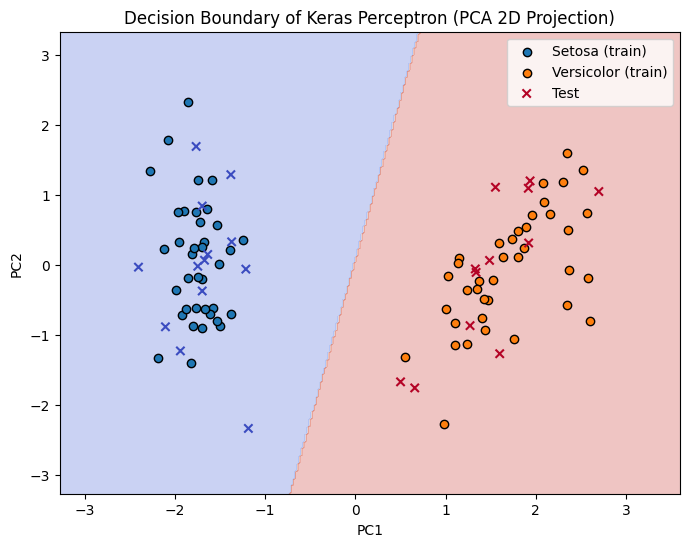

In [16]:
# 6. PCA (4D -> 2D) for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D  = pca.transform(X_test)

# 7. Retrain perceptron in 2D for plotting
model_2D = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])
model_2D.compile(optimizer=tf.keras.optimizers.SGD(0.1),
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
model_2D.fit(X_train_2D, y_train, epochs=50, verbose=0)

# 8. Create mesh grid for boundary
xx, yy = np.meshgrid(
    np.linspace(X_train_2D[:,0].min()-1, X_train_2D[:,0].max()+1, 300),
    np.linspace(X_train_2D[:,1].min()-1, X_train_2D[:,1].max()+1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
preds = (model_2D.predict(grid, verbose=0) > 0.5).astype(int).reshape(xx.shape)

# 9. Plot decision boundary and data points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, preds, alpha=0.3, cmap="coolwarm")

plt.scatter(X_train_2D[y_train==0,0], X_train_2D[y_train==0,1],
            label="Setosa (train)", edgecolor="k")
plt.scatter(X_train_2D[y_train==1,0], X_train_2D[y_train==1,1],
            label="Versicolor (train)", edgecolor="k")

plt.scatter(X_test_2D[:,0], X_test_2D[:,1], c=y_test,
            marker='x', cmap="coolwarm", label="Test")

plt.title("Decision Boundary of Keras Perceptron (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()